In [2]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import *
from sklearn.compose import *
from sklearn.pipeline import *
from sklearn.model_selection import *
from sklearn.impute import *

vente=pd.read_excel("VENTES.xlsx")
print(vente.head())
x=vente[['ville','nbr_piece','etage','annee_cons','surface','departement']]
y=vente['prix']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
##transformer
#variables_numeric=make_column_selector(dtype_include=np.number)
#variables_categoric=make_column_selector(dtype_exclude=np.number)

#variables_numeric=vente[['nbr_piece','etage','surface']]
#variables_categoric=vente['ville']

#variables_categoric=make_column_selector(dtype_exclude=np.number)

pipeline_numeric=make_pipeline(SimpleImputer(strategy='mean',missing_values=np.nan))
pipeline_categoric=make_pipeline(OrdinalEncoder())


#transformer_principale
trans_princ=make_column_transformer((pipeline_numeric,['departement','nbr_piece','etage','annee_cons','surface']),(pipeline_categoric,['ville']))

#pipeline_principale
pip_prin=make_pipeline(trans_princ,LinearRegression())
pip_prin.fit(xtrain,ytrain)
pip_prin.predict(xtest)
pip_prin.score(xtest,ytest)









   departement  ville                   adresse  annee_cons  nbr_piece  etage  \
0           59  LILLE       39 RUE BONTE POLLET         NaN          4      4   
1           59  LILLE       44 RUE BONTE POLLET      1991.0          4      5   
2           59  LILLE       57 RUE BONTE POLLET      1973.0          5      2   
3           59  LILLE  5 AVENUE DE LA BRETAGNE       2000.0          3      3   
4           59  LILLE  5 AVENUE DE LA BRETAGNE       2000.0          3      2   

   surface    prix  prix_metre  
0       71  190000     2676.06  
1       83  295000     3554.22  
2       92  160000     1739.13  
3       64  166000     2593.75  
4       64  171000     2671.88  


0.17943393798653473

variance=> ville            0.034483
nbr_piece        0.401478
etage            5.041872
annee_cons     573.105911
surface        219.748768
departement      0.000000
dtype: float64
[False False  True  True  True False]
[False False False  True  True False]
[ True  True False False False False]
<function BaseEstimator.get_params at 0x0D42F3D8>
prediction=> [186375.46111683 303896.56272773 213639.24695043 165223.44932186
 101104.87968604 232755.69903243]
score =>  0.7817673023933656
    etage  annee_cons  surface
1       5      1991.0       83
2       2      1973.0       92
3       3      2000.0       64
4       2      2000.0       64
5       1      2015.0       60
6       1      2014.0       85
7       2      2014.0       90
8       1      2014.0       93
9       1      2000.0       74
10      3      1961.0       65
11      8      1962.0       65
12      1      1962.0       65
13      2      1962.0       65
14      8      1961.0       65
15      4      1962.0       65
16      2      19

c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\Packard Bell\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 0, 'prix')

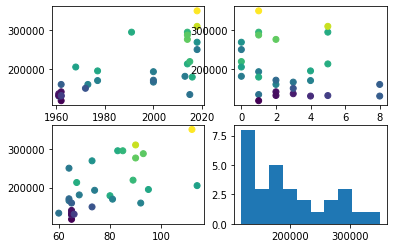

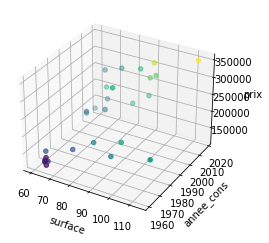

In [92]:
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D



vente["ville"].replace(["LILLE","LAMBERSART"],[0,1],inplace=True)
vente.dropna(axis=0,inplace=True)
x=vente[['ville','nbr_piece','etage','annee_cons','surface','departement']]
y=vente['prix']



####features_selection #####
print("variance=>",x.var())
selector=VarianceThreshold(threshold=2) #supprime toutes les fonctionnalités à faible variance
selector.fit_transform(x)
print(selector.get_support())


selector_2=SelectKBest(f_regression,k=2) #test de dependance f_regression ,
selector_2.fit_transform(x,y)
print(selector_2.get_support())

selector_3=SelectFromModel(LinearRegression()) 
selector_3.fit_transform(x,y)
print(selector_3.get_support())


###model#######
x_select=vente[['etage','annee_cons','surface']]
xtrain,xtest,ytrain,ytest=train_test_split(x_select,y,train_size=0.8,random_state=0)
para=LinearRegression.get_params
print(para)
params={
    'solver':['svd','eigen']
    }

model=LinearRegression()
model.fit(xtrain,ytrain)
print("prediction=>",model.predict(xtest))
print("score => ",model.score(xtest,ytest))

##visualisation
print(x_select)
print(y.shape)
fig1=plt.figure()
fig1.add_subplot(2,2,1)
plt.scatter(vente['annee_cons'],vente['prix'],c=model.predict(x_select))
fig1.add_subplot(2,2,2)
plt.scatter(vente['etage'],vente['prix'],c=model.predict(x_select))
fig1.add_subplot(2,2,3)
plt.scatter(vente['surface'],vente['prix'],c=model.predict(x_select))
fig1.add_subplot(2,2,4)
plt.hist(vente['prix'])

fig2=plt.figure()
axe1=plt.axes(projection='3d')
axe1.scatter(vente['surface'],vente['annee_cons'],vente['prix'],c=model.predict(x_select))
axe1.set_xlabel("surface")
axe1.set_ylabel("annee_cons")
axe1.set_zlabel('prix')

